In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from pandas.plotting import table
import matplotlib.pyplot as plt
from datetime import datetime

codigo usado para ler todos os arquivos de saida do programa passado pelo peixoto e transforma-los em um dataset

In [2]:
os.chdir("split with depths/")
print(os.getcwd())

/home/tomas/Desktop/TCC/Deeplearning_Video_Compressing/split with depths


In [3]:
diretorios = pd.Series(os.listdir())
Informacoes = pd.DataFrame(data=[],columns=['Origem','Frame','Height','Width','QP','Split'])

In [4]:
j =0
for diretorio in diretorios:
    string = './'+diretorio
    os.chdir(string)
    print('Entering: ' + os.getcwd())
    files = os.listdir('./')
    os.getcwd().split(" ")[-1]
    Arquivos = pd.DataFrame(files,columns=['Arquivos'])
    Arquivos = Arquivos.loc[Arquivos['Arquivos'].str.contains("Depth_0")]
    Arquivos['From'] = os.getcwd().split(" ")[-1]
    Arquivos['From'] = Arquivos['From'].str.extract("/([A-Za-z]*)")
    for i in range(Arquivos.shape[0]):
        txt = Arquivos.iloc[i,0]
        temporario = pd.read_csv(txt,sep='\n',header = None,names=['info'],engine='c')
        origem = Arquivos.iloc[0,1]
        temporario['Origem'] = origem
        temporario['Frame'] = txt
        temporario['Frame'] = temporario['Frame'].str.extract('frame_(\d*)')
        temporario['Height'] = temporario['info'].str.extract('\(\s*(\d*)')
        temporario['Width'] = temporario['info'].str.extract(',\s*(\d*)')
        temporario['QP'] = diretorio[-2:]
        temporario['Split'] = temporario['info'].str.extract('(\d)\s$')
        temporario.drop(columns=['info'],inplace=True)
        Informacoes = pd.concat([Informacoes,temporario],ignore_index=True)
        del(temporario)
    Informacoes['Frame'] = Informacoes['Frame'].astype('uint16')
    Informacoes['Height'] = Informacoes['Height'].astype('uint16')
    Informacoes['Width'] = Informacoes['Width'].astype('uint16')
    Informacoes['QP'] = Informacoes['QP'].astype('uint8')
    Informacoes['Split'] = Informacoes['Split'].astype('uint8')
    print('\nArquivos que ja foram:',end='')
    print(Informacoes['Origem'].unique())
    j+=1
    print("\n TOTAL:" + str(j))
    print(Informacoes.info(verbose = False,memory_usage="deep"))
    print(datetime.now().strftime("%H:%M"))
    print()
    print('Finished: ' + os.getcwd())
    os.chdir('..')

Entering: /home/tomas/Desktop/TCC/Deeplearning_Video_Compressing/split with depths/SunFlower22

Arquivos que ja foram:['SunFlower']

 TOTAL:1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255000 entries, 0 to 254999
Columns: 6 entries, Origem to Split
dtypes: object(1), uint16(3), uint8(2)
memory usage: 18.0 MB
None
02:36

Finished: /home/tomas/Desktop/TCC/Deeplearning_Video_Compressing/split with depths/SunFlower22
Entering: /home/tomas/Desktop/TCC/Deeplearning_Video_Compressing/split with depths/OldTown32

Arquivos que ja foram:['SunFlower' 'OldTown']

 TOTAL:2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510000 entries, 0 to 509999
Columns: 6 entries, Origem to Split
dtypes: object(1), uint16(3), uint8(2)
memory usage: 35.5 MB
None
02:36

Finished: /home/tomas/Desktop/TCC/Deeplearning_Video_Compressing/split with depths/OldTown32
Entering: /home/tomas/Desktop/TCC/Deeplearning_Video_Compressing/split with depths/SunFlower37

Arquivos que ja foram:['SunFlower' 'OldTown']

 TO

In [5]:
Informacoes['Origem'].unique()

array(['SunFlower', 'OldTown', 'Crowdrun', 'ParkJoy', 'RushHour', 'Ducks'],
      dtype=object)

In [6]:
Informacoes

,Origem,Frame,Height,Width,QP,Split
0,SunFlower,338,0,0,22,1
1,SunFlower,338,0,64,22,0
2,SunFlower,338,0,128,22,1
3,SunFlower,338,0,192,22,0
4,SunFlower,338,0,256,22,1
...,...,...,...,...,...,...
6119995,SunFlower,0,1024,1600,32,1
6119996,SunFlower,0,1024,1664,32,1
6119997,SunFlower,0,1024,1728,32,1
6119998,SunFlower,0,1024,1792,32,1


In [ ]:
cte_height = 1080;
cte_width = 1920;

Aqui nos lemos o dataset que dividimos em 4 partes para caber no Github

In [8]:
Informacoes.shape

(24480000, 6)

In [8]:
Informacoes.head()

,Origem,Frame,Height,Width,QP,Split
0,SunFlower,338,0,0,22,1
1,SunFlower,338,0,64,22,0
2,SunFlower,338,0,128,22,1
3,SunFlower,338,0,192,22,0
4,SunFlower,338,0,256,22,1


dropando as linhas que o CU já é cortado, desta forma não o utilizaremos para treinar a rede neural

In [7]:
Informacoes["Height_Final"] = Informacoes["Height"]+63
Informacoes["Width_Final"] = Informacoes["Width"]+63
Informacoes.drop(Informacoes.loc[(Informacoes["Height_Final"]>cte_height)|(Informacoes["Width_Final"]>cte_width)].index,inplace=True)
Informacoes.drop(columns=['Height_Final',"Width_Final"],inplace=True)

In [8]:
Informacoes.shape

(5760000, 6)

In [9]:
Informacoes.head()

,Origem,Frame,Height,Width,QP,Split
index,,,,,,
0,Crowdrun,323,0,0,41,1
1,Crowdrun,323,0,64,41,1
2,Crowdrun,323,0,128,41,0
3,Crowdrun,323,0,192,41,0
4,Crowdrun,323,0,256,41,0


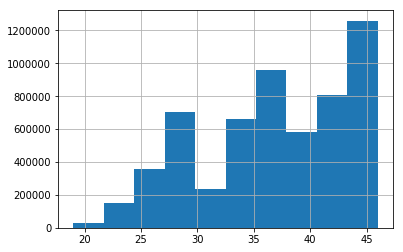

In [10]:
Informacoes['QP'].hist()

In [11]:
os.getcwd()

'/home/tomas/Desktop/UNB/Deeplearning_Video_Compressing'

Lemos os videos para podermos mapear o canal Y de cada frame

In [12]:
parkjoy = np.fromfile('./Videos/ParkJoy_1920x1080_50_8bit_420.yuv',dtype='uint8')
rushhour= np.fromfile('./Videos/RushHour_1920x1080_25_8bit_420.yuv',dtype='uint8')
oldtown = np.fromfile('./Videos/OldTownCross_1920x1080_50_8bit_420.yuv',dtype='uint8')
ducks = np.fromfile('./Videos/DucksTakeOff_1920x1080_50_8bit_420.yuv',dtype='uint8')
crowdrun = np.fromfile('./Videos/Crowdrun_1920x1080_50_8bit_420.yuv',dtype='uint8')
sunflower = np.fromfile('./Videos/Sunflower_1920x1080_25_8bit_420.yuv',dtype='uint8')

In [13]:
crowdrun.shape

(1555200000,)

In [14]:
parkjoy.shape

(1555200000,)

In [15]:
rushhour.shape

(1555200000,)

In [16]:
oldtown.shape

(1555200000,)

In [17]:
ducks.shape

(1555200000,)

In [18]:
crowdrun.shape

(1555200000,)

In [19]:
sunflower.shape

(1555200000,)

In [20]:
Map = {"OldTown":oldtown,'Crowdrun':crowdrun,'SunFlower':sunflower,"ParkJoy":parkjoy,'Ducks':ducks,'RushHour':rushhour}

In [21]:
def generate_input(row,cte_height,cte_width):
    begin_Frame = int(row['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
    end_Frame = (int(row['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width
    begin_Frame = int(begin_Frame)
    end_Frame = int(end_Frame)
    Input = (Map[row['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width]))[row['Height']:row['Height']+64,row['Width']:row['Width']+64]
    return np.append(Input.reshape(1,64*64)[0],row["QP"])

In [ ]:
Info["INPUT"] = Info.apply(lambda x : generate_input(x,cte_height,cte_width),axis=1)

In [ ]:
Info

In [ ]:
begin_Frame = int(Training_set.iloc[i]['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
end_Frame = (int(Training_set.iloc[i]['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width
begin_Frame = int(begin_Frame)
end_Frame = int(end_Frame)

In [64]:
Input = Map[Training_set.iloc[i]['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width])
Height = Training_set.iloc[i]["Height"]
Width = Training_set.iloc[i]["Width"]
Input_2  = Input[Height:Height+64,Width:Width+64]
Input_2 = Input_2.reshape(1,64*64)[0]
Input_2 = np.append(Input_2,Training_set.iloc[i]["QP"])
Output = Training_set.iloc[i]["Split"]

In [23]:
Data_Validation = Informacoes.iloc[int(4*Informacoes.shape[0]/5):].copy()

In [24]:
Test_set = Informacoes.iloc[int(3*Informacoes.shape[0]/5):int(4*Informacoes.shape[0]/5)].copy()

In [25]:
Training_set = Informacoes.iloc[:int(3*Informacoes.shape[0]/5)].copy()

In [26]:
Informacoes.head()

,Origem,Frame,Height,Width,QP,Split
index,,,,,,
4800672,Ducks,419,64,768,36,0
1086346,RushHour,118,64,1024,45,0
4777884,Ducks,80,384,1536,28,1
812234,ParkJoy,346,640,896,34,1
4011227,RushHour,241,128,1088,41,0


Tentando fazer usando uma parte da Info de cada vez, ver se a memoria Ram aguenta
Rodar essa parte toda para cada depth part e cada video

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from pandas.plotting import table
import matplotlib.pyplot as plt

In [2]:
cte_height = 1080;
cte_width = 1920;

In [3]:
Info = pd.read_csv("Depth0_part1")

In [4]:
Info.set_index("index",inplace=True)

In [5]:
Info['Origem'].unique()

array(['Crowdrun', 'SunFlower', 'ParkJoy', 'RushHour', 'OldTown'],
      dtype=object)

In [6]:
Info["Height_Final"] = Info["Height"]+63
Info["Width_Final"] = Info["Width"]+63
Info.drop(Info.loc[(Info["Height_Final"]>cte_height)|(Info["Width_Final"]>cte_width)].index,inplace=True)
Info.drop(columns=['Height_Final',"Width_Final"],inplace=True)

In [7]:
crowdrun = np.fromfile('./Videos/Crowdrun_1920x1080_50_8bit_420.yuv',dtype='uint8')



#parkjoy = np.fromfile('./Videos/ParkJoy_1920x1080_50_8bit_420.yuv',dtype='uint8')
#rushhour= np.fromfile('./Videos/RushHour_1920x1080_25_8bit_420.yuv',dtype='uint8')
#oldtown = np.fromfile('./Videos/OldTownCross_1920x1080_50_8bit_420.yuv',dtype='uint8')
#ducks = np.fromfile('./Videos/DucksTakeOff_1920x1080_50_8bit_420.yuv',dtype='uint8')
#sunflower = np.fromfile('./Videos/Sunflower_1920x1080_25_8bit_420.yuv',dtype='uint8')

In [8]:
#Map = {"OldTown":oldtown,'Crowdrun':crowdrun,'SunFlower':sunflower,"ParkJoy":parkjoy,'Ducks':ducks,'RushHour':rushhour}
Map = {'Crowdrun':crowdrun}

In [9]:
def generate_input(row,cte_height,cte_width):
    begin_Frame = int(row['Frame'])*(cte_height*cte_width + cte_height*cte_width/2)
    end_Frame = (int(row['Frame']))*(cte_height*cte_width + cte_height*cte_width/2)+cte_height*cte_width
    begin_Frame = int(begin_Frame)
    end_Frame = int(end_Frame)
    Input = (Map[row['Origem']][begin_Frame:end_Frame].reshape([cte_height,cte_width]))[row['Height']:row['Height']+64,row['Width']:row['Width']+64]
    return np.append(Input.reshape(1,64*64)[0],row["QP"])

In [10]:
Info = Info.loc[Info['Origem'].str.contains("Crow")].copy()
Info["INPUT"] = Info.apply(lambda x : generate_input(x,cte_height,cte_width),axis=1)

In [15]:
for i in range(Info.shape[0]):
    cv2.imwrite('./Depth_0/{}_{}_{}_{}_{}.png'.format(Info.iloc[i]['Origem'],Info.iloc[i]['Frame'],Info.iloc[i]['Height'],Info.iloc[i]['Width'],Info.iloc[i]['Split']),Info.iloc[i]['INPUT'])